# PanelJam Like-Graph

***PanelJam.com*** is a small online community of artists, on which cartoons are published. In particular each cartoon (also called jam) is made up by different panels drawn by distinct users: so it is the result of some artists collaboration.

**This script analyzes and shows PanelJam like graph.**

The used libraries are:
- ***pyplot***: pyplot is mainly intended for interactive plots and simple cases of programmatic plot generation
- ***networkx***:  is a Python library for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.
- ***pickle***: is a library which implements binary protocols for serializing and de-serializing a Python object structure.

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import pickle

First we de-serialize the file ***likeGraph.pckl*** to load the graph.

Looking at the number of nodes (that represent the artists) and edges (that represent the like-relationship) we can see that the number of edges is much grater than the number of edges in the friendship-Graph and collaboration-Graph.

In [3]:
file = open('likeGraph.pckl', 'rb')
likeGraph = pickle.load(file)
file.close()

print('Number of nodes/users: ', likeGraph.number_of_nodes())
print('Number of edges: ', likeGraph.number_of_edges())
print('Edges for user in average: ', round(likeGraph.number_of_edges()/likeGraph.number_of_nodes(), 3))

Number of nodes/users:  3038
Number of edges:  10209
Edges for user in average:  3.36


The like-graph is **directed** and **weighted**: given an edge from A to B, the related weight represents the number of likes that A has given to B.

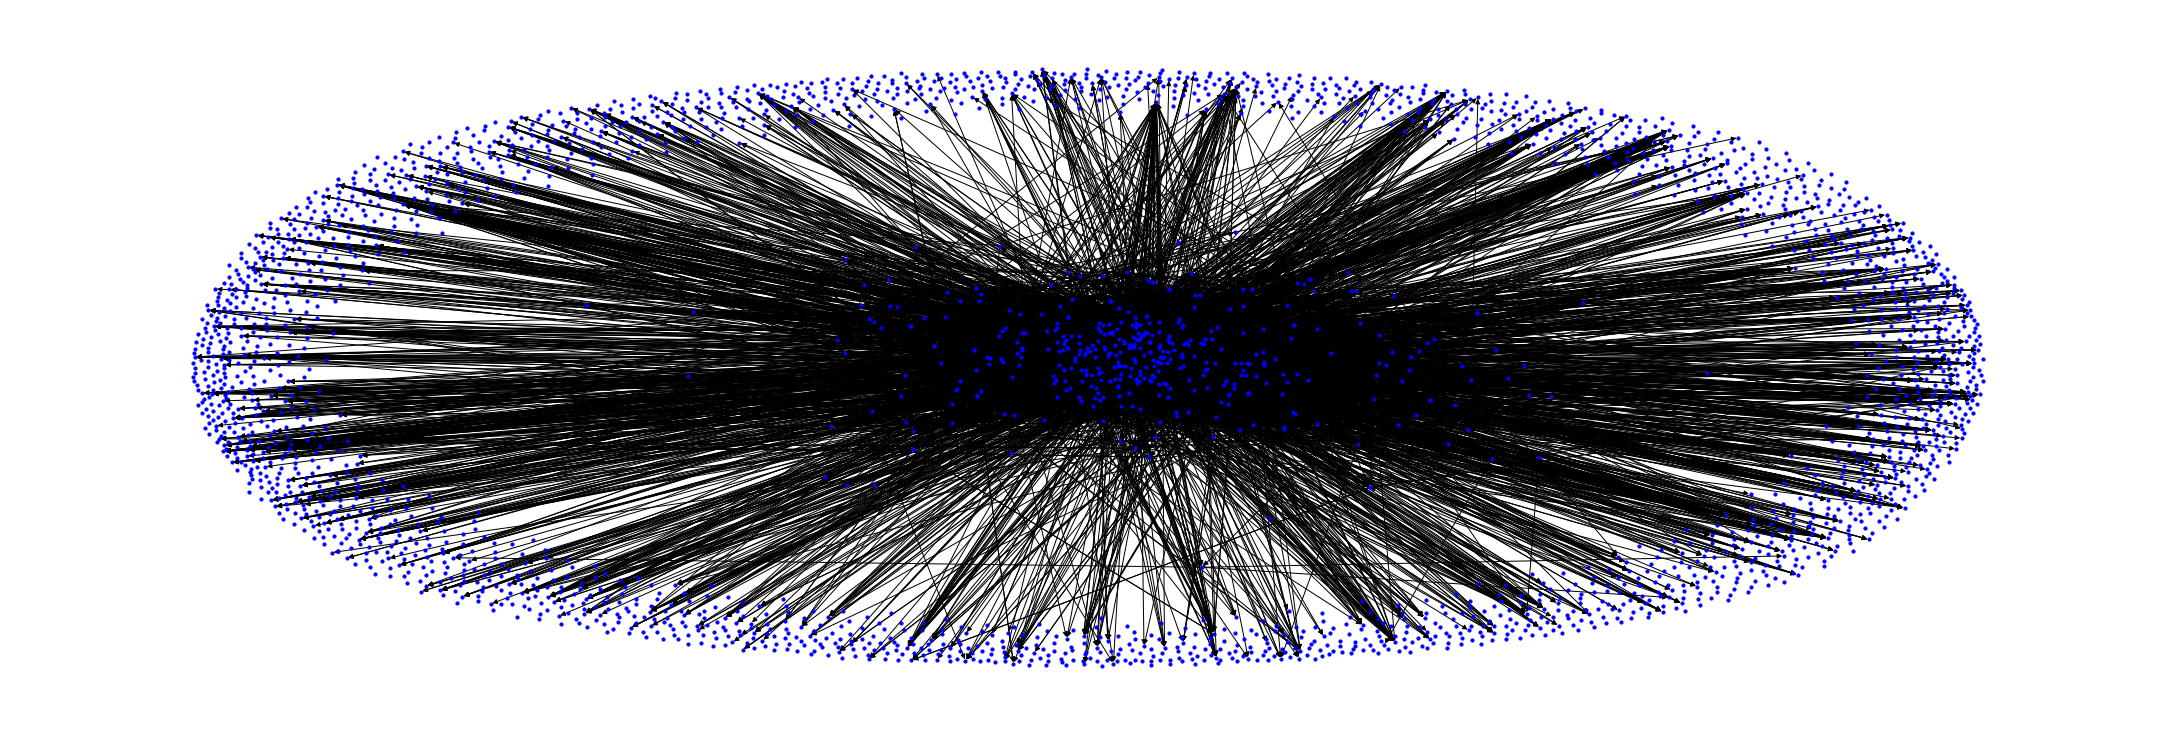

In [6]:
nodes_position = nx.spring_layout(likeGraph)
nx.draw(likeGraph, pos=nodes_position, node_color='b', node_size=10, with_labels=False)
plt.rcParams['figure.figsize'] = [30, 10]
plt.show()

The graph of the most connected component of the like-graph shows that there are some outliers, i.e. there are very few case in wich a user A gives an abnormal numero of likes to a user B since the most of the edges have a very light color.

In [3]:
# Draw the most connected component
conn_comp = nx.strongly_connected_components(likeGraph)
subnet_nodes = max(conn_comp, key=len)
subnet = likeGraph.subgraph(subnet_nodes)
weights = list((nx.get_edge_attributes(subnet, 'weight')).values())

min_weight = min(weights)
max_weight = max(weights)

In [29]:
nodes_position = nx.spring_layout(subnet)
color_map = plt.cm.Blues

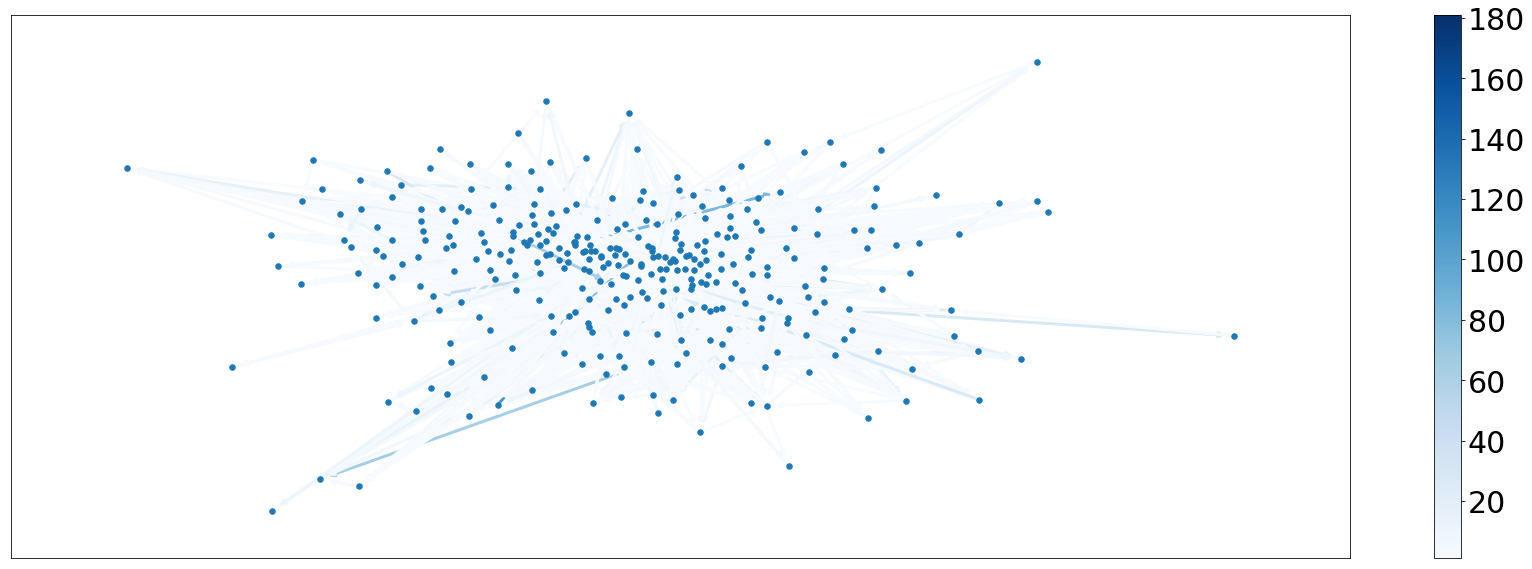

In [30]:
nx.draw_networkx_nodes(subnet, nodes_position, subnet_nodes, with_labels=True, font_size=50, node_size=30)
nx.draw_networkx_edges(subnet, nodes_position, edge_color=weights, width=3, edge_cmap=color_map, edge_min=min_weight, edge_max=max_weight)
sm = plt.cm.ScalarMappable(cmap=color_map, norm=plt.Normalize(vmin=min_weight, vmax=max_weight))
sm._A = []
plt.rcParams['figure.figsize'] = [30, 10]
plt.colorbar(sm)
plt.show()

The subnet has 6571 edges
Edges with weight 1 occures 3941 times
Edges with weight 181 occures 1 times


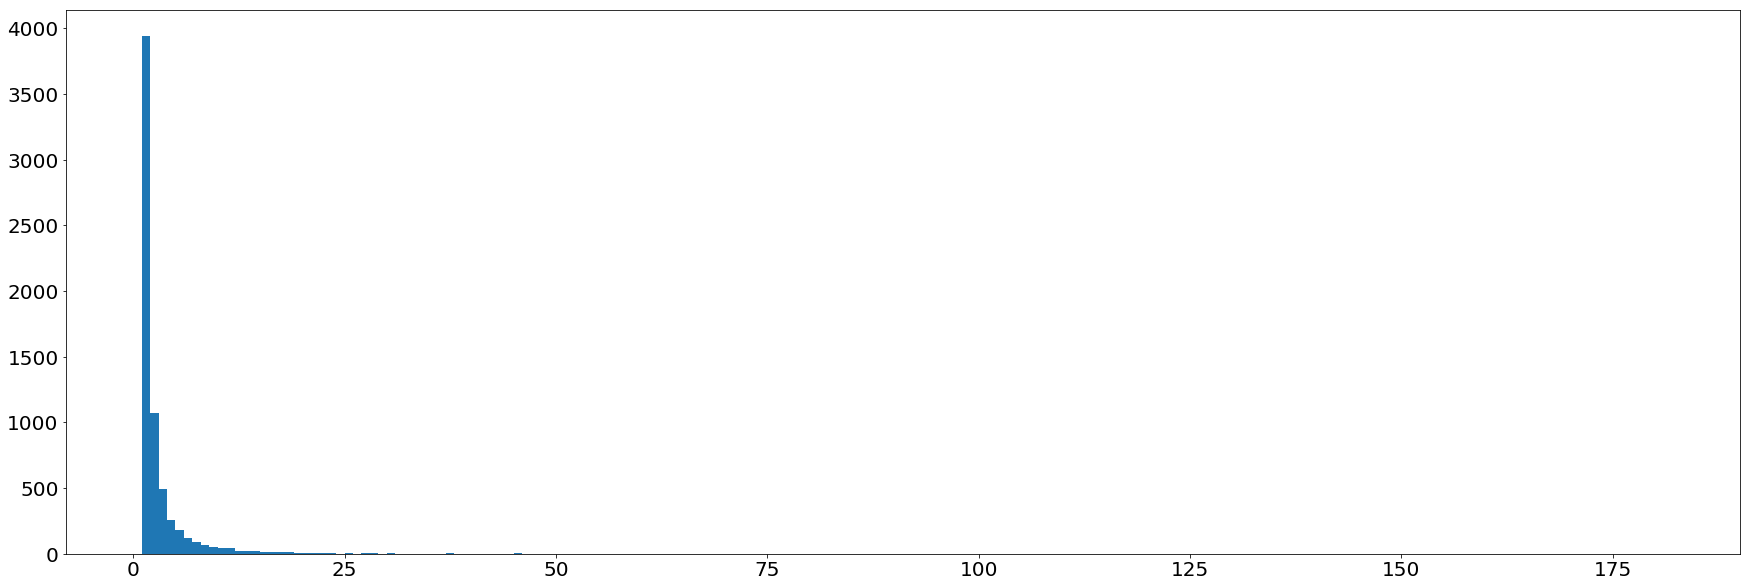

In [23]:
import numpy as np
print('The subnet has ' + str(subnet.number_of_edges()) + ' edges')
print('Edges with weight ' + str(min(weights)) + ' occures ' + str(weights.count(min(weights))) + ' times')
print('Edges with weight ' + str(max(weights)) + ' occures ' + str(weights.count(max(weights))) + ' times')
plt.hist(weights, bins=np.arange(min(weights), max(weights)+1))
plt.rcParams['figure.figsize'] = [30, 10]
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 
plt.show()

The following code create a sorted list of tuple that reports the number of likes received by each artist. We show the top 10 liked artists.

In [7]:
# Count likes
likes = {}

for node in list(likeGraph.nodes):
    in_neighbors = [i[0] for i in list(likeGraph.in_edges(node))]
    num_likes = 0

    for neighbor in in_neighbors:
        num_likes = num_likes + likeGraph[neighbor][node]['weight']

    likes[node] = num_likes
    
sorted_likes = sorted(likes.items(), key=lambda x: x[1], reverse=True)

print('Top 10 most liked users: \n', sorted_likes[1:10])

Top 10 most liked users: 
 [('y3liak', 716), ('Sho-bo', 708), ('Yntec', 643), ('Juleefish%20', 628), ('Potato%20Man', 620), ('Robro', 615), ('Mojomos', 512), ('Izzaro21', 511), ('WizardCroissant', 445)]


In the following code we show the top 10 authorities and hubs: note that the most authoritative node IS NOT the artist that has received the highest number of likes.

In [11]:
# HUBS & AUTHORITIES
degrees = likeGraph.degree
in_degrees = likeGraph.in_degree
out_degrees = likeGraph.out_degree

authorities = sorted(in_degrees, key=lambda x: x[1], reverse=True)[:10]
hubs = sorted(out_degrees, key=lambda x: x[1], reverse=True)[:10]

print('Authorities: \n', authorities)
print('Hubs: \n', hubs)

Authorities: 
 [('y3liak', 140), ('Juleefish%20', 140), ('Izzaro21', 138), ('joshyouart', 138), ('Mojomos', 131), ('Sho-bo', 129), ('jamdaddy', 128), ('Robro', 118), ('Potato%20Man', 111), ('ironically%20horny', 102)]
Hubs: 
 [('jamdaddy', 482), ('Delete', 249), ('joshyouart', 239), ('Robro', 192), ('Izzaro21', 169), ('SpaceMuse', 167), ('Mojomos', 147), ('Potato Man', 147), ('Potato%20Man', 146), ('Handicrapped', 142)]


In conclusion, we show the ego network of the most authoritative node.

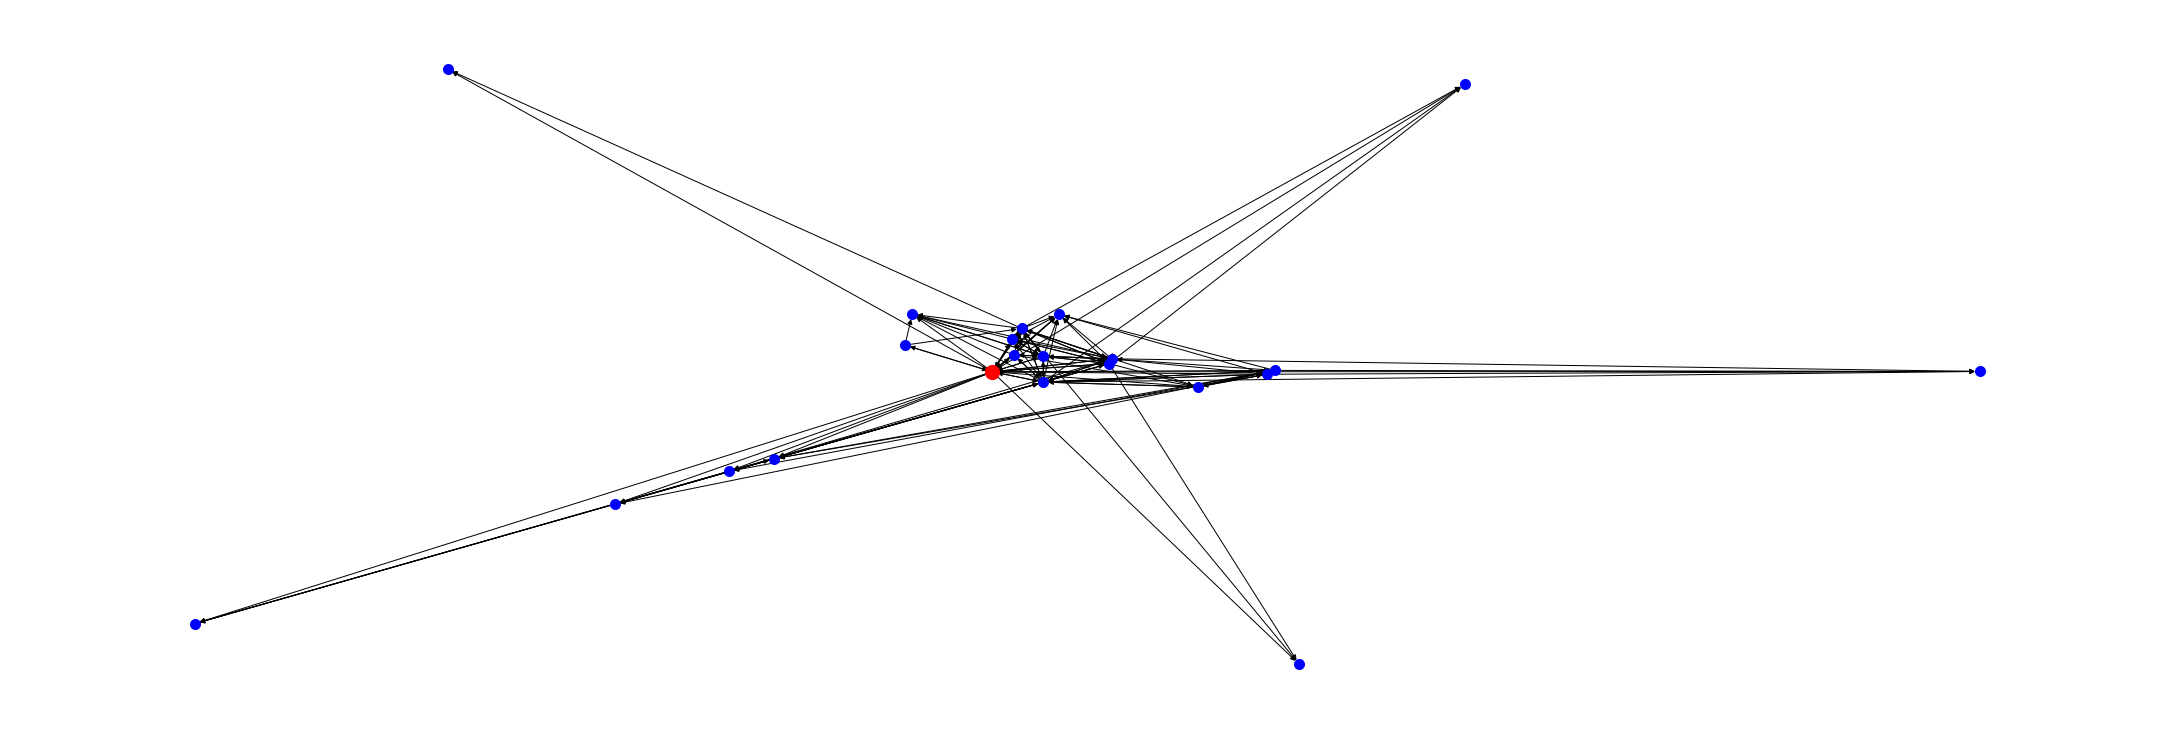

In [14]:
ego = authorities[0][0]
ego_net = nx.ego_graph(likeGraph, ego, radius=1)
pos = nx.spring_layout(ego_net)
nx.draw(ego_net, pos, node_color='b', node_size=100, with_labels=False)
nx.draw_networkx_nodes(ego_net, pos, nodelist=[ego], node_size=200, node_color='r')
plt.rcParams['figure.figsize'] = [30, 10]
plt.show()